In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os


In [24]:
df = pd.read_csv('C:/Users/admin/Employee-Salary-Prediction/salary_prediction_data.csv')
df.head()


,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


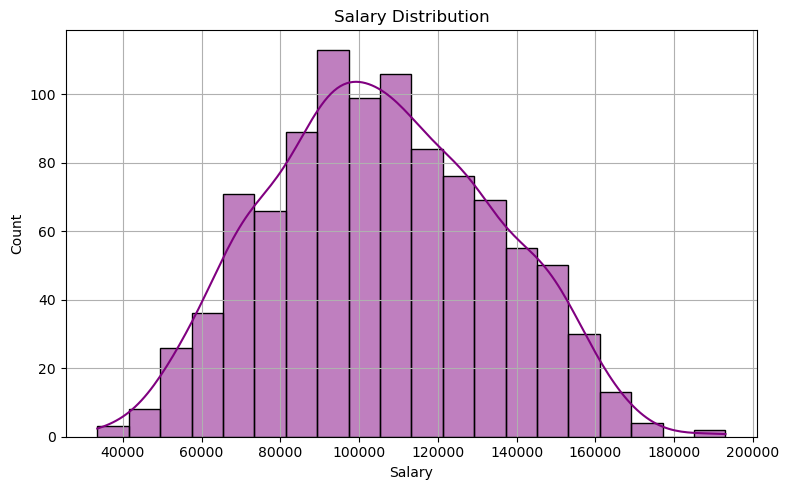

In [25]:
os.makedirs("images", exist_ok=True)

plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, color='purple')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.savefig('images/salary_distribution.png')
plt.show()


In [26]:
X = df.drop('Salary', axis=1)
y = df['Salary']

categorical = ['Education', 'Location', 'Job_Title', 'Gender']
numerical = ['Experience', 'Age']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical),
    ('num', StandardScaler(), numerical)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Education', 'Location',
                                                   'Job_Title', 'Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Experience', 'Age'])])),
                ('regressor', LinearRegression())])

R² Score: 0.8657143209676157
Mean Squared Error: 109647822.95174025


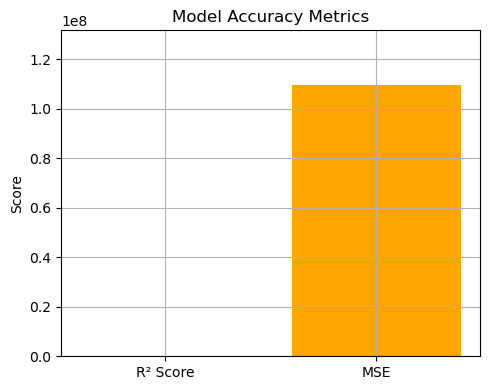

In [27]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

plt.figure(figsize=(5, 4))
plt.bar(['R² Score', 'MSE'], [r2, mse], color=['green', 'orange'])
plt.title("Model Accuracy Metrics")
plt.ylim(0, max(r2, mse) * 1.2)
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.savefig('images/model_score.png')
plt.show()


In [28]:
sample = pd.DataFrame([{
    'Experience': 5,
    'Age': 30,
    'Education': 'Masters',
    'Location': 'Urban',
    'Job_Title': 'Engineer',
    'Gender': 'Male'
}])

sample = sample[X.columns]

predicted_salary = model.predict(sample)[0]
print("Input:", sample.to_dict(orient='records')[0])
print("Predicted Salary: ₹", round(predicted_salary, 2))


Input: {'Education': 'Masters', 'Experience': 5, 'Location': 'Urban', 'Job_Title': 'Engineer', 'Age': 30, 'Gender': 'Male'}
Predicted Salary: ₹ 4.0380990535442e+17
